# ENV

In [ ]:
!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          99G   32G   62G  34% /
tmpfs            64M     0   64M   0% /dev
tmpfs            45G     0   45G   0% /sys/fs/cgroup
shm             4.0G     0  4.0G   0% /dev/shm
/dev/xvdb1       99G   32G   62G  34% /etc/hosts
tmpfs            45G   12K   45G   1% /proc/driver/nvidia
/dev/xvda1       48G  8.1G   37G  18% /usr/bin/nvidia-smi
udev             45G     0   45G   0% /dev/nvidia0
tmpfs            45G     0   45G   0% /proc/acpi
tmpfs            45G     0   45G   0% /proc/scsi
tmpfs            45G     0   45G   0% /sys/firmware


# train csv 파일 읽어오기

In [3]:
train_df = pd.read_csv('/opt/ml/dataset/train/train.csv')
train_df

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia


# label 분포 시각화 (관계 이름 , 가로 ver)

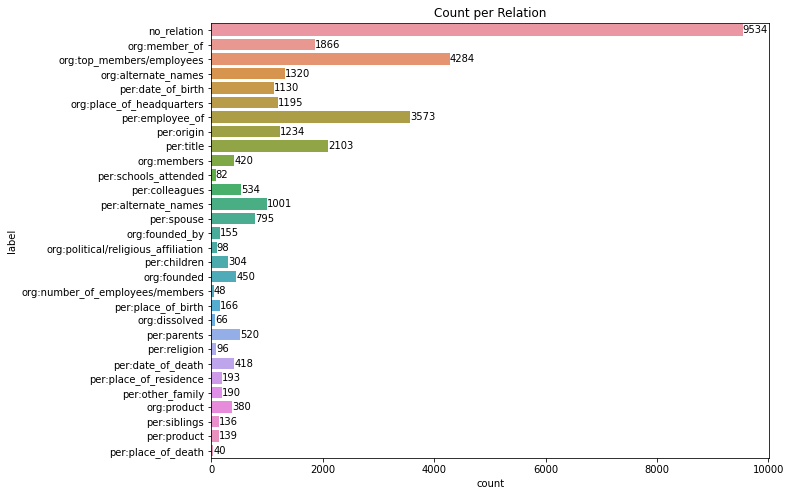

In [4]:
# Relation 순서는 무작위입니다.
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.countplot(y='label', data=train_df, ax=ax)
plt.title("Count per Relation")

for p in ax.patches:
        ax.annotate('{}'.format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+0.6), fontsize=10)

# dict_label_to_num 이용해 label을 num으로 변경한 col 추가

In [5]:
import pickle as pickle

def label_to_num(x):
  with open('dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)  
  return dict_label_to_num[x]

In [6]:
train_df['label_num'] = train_df['label'].map(lambda x: label_to_num(x))
train_df

,id,sentence,subject_entity,object_entity,label,source,label_num
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,0
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,0
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,20
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,1
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,0
...,...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree,6
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia,14
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree,1
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia,0


# label 분포 시각화 (세로 ver)

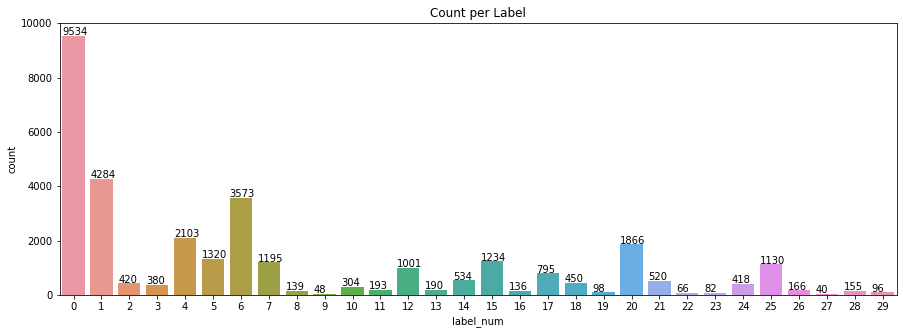

In [7]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.countplot(x='label_num', data=train_df, ax=ax)
plt.title("Count per Label")

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+30), fontsize=10)

# sentence 길이 describe 및 시각화

In [8]:
train_df['sen_len'] = train_df['sentence'].map(lambda x: len(x))

In [9]:
train_df

,id,sentence,subject_entity,object_entity,label,source,label_num,sen_len
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,0,59
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,0,54
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,20,99
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,1,78
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,0,56
...,...,...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree,6,213
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia,14,67
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree,1,115
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia,0,65


In [10]:
s = train_df['sen_len']
s.describe()

count    32470.000000
mean        97.083954
std         47.939902
min         14.000000
25%         64.000000
50%         87.000000
75%        118.000000
max        455.000000
Name: sen_len, dtype: float64

Text(0.5, 1.0, 'Sentence Length histogram')

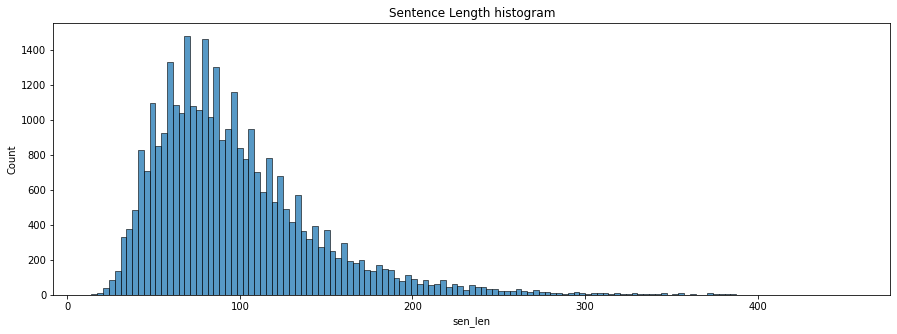

In [11]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))
sns.histplot(x='sen_len', data=train_df, ax=ax)
plt.title("Sentence Length histogram")

Text(0.5, 1.0, 'Sentence Length distribution per label')

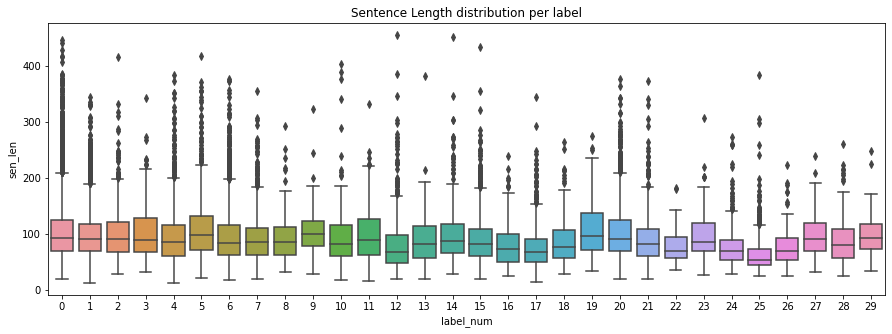

In [12]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))
sns.boxplot(x='label_num', y='sen_len', data=train_df, ax=ax)
plt.title("Sentence Length distribution per label")

# 중복 데이터 확인

In [13]:
 # sentence만 동일한 것들 (중복 문장은 있는데 s o 가 다른 것도 있고 같은 것도 있음. 더 겹치는 게 있나 자세히 봐야함)
train_df[train_df.duplicated('sentence', keep=False)].sort_values('sentence')

,id,sentence,subject_entity,object_entity,label,source,label_num,sen_len
919,919,"""2006년 지방선거에 참패하고 민주당과 그 전신인 열린 우리당은 노 씨의 국정 운...","{'word': '열린 우리당', 'start_idx': 29, 'end_idx':...","{'word': '노무현', 'start_idx': 127, 'end_idx': 1...",no_relation,wikipedia,0,234
14736,14736,"""2006년 지방선거에 참패하고 민주당과 그 전신인 열린 우리당은 노 씨의 국정 운...","{'word': '열린 우리당', 'start_idx': 29, 'end_idx':...","{'word': '정세균', 'start_idx': 108, 'end_idx': 1...",no_relation,wikipedia,0,234
28051,28051,"""소이현, 인교진이 하는 광고는 괜찮고"", ""차 광고할 때 여자가 남자한테 하던 소...","{'word': '소이현', 'start_idx': 52, 'end_idx': 54...","{'word': '인교진', 'start_idx': 6, 'end_idx': 8, ...",no_relation,wikitree,0,85
3588,3588,"""소이현, 인교진이 하는 광고는 괜찮고"", ""차 광고할 때 여자가 남자한테 하던 소...","{'word': '인교진', 'start_idx': 6, 'end_idx': 8, ...","{'word': '소이현', 'start_idx': 52, 'end_idx': 54...",no_relation,wikitree,0,85
32434,32434,"""탕약망""이란 예수회 선교사 천문학자 아담 샬의 중국 이름이다.","{'word': '아담 샬', 'start_idx': 21, 'end_idx': 2...","{'word': '예수회', 'start_idx': 8, 'end_idx': 10,...",per:employee_of,wikipedia,6,35
...,...,...,...,...,...,...,...,...
1621,1621,힐러리 클린턴 이메일 논쟁은 2016년 미국 대통령 선거에서 미국 공화당 도널드 트...,"{'word': '힐러리 클린턴', 'start_idx': 60, 'end_idx'...","{'word': '민주당', 'start_idx': 56, 'end_idx': 58...",per:employee_of,wikipedia,6,94
2539,2539,힐러리 클린턴은 2016년 7월 26일 필라델피아에서 열린 민주당 전당대회에서 공식...,"{'word': '힐러리 클린턴', 'start_idx': 0, 'end_idx':...","{'word': '민주당', 'start_idx': 50, 'end_idx': 52...",per:employee_of,wikipedia,6,97
20903,20903,힐러리 클린턴은 2016년 7월 26일 필라델피아에서 열린 민주당 전당대회에서 공식...,"{'word': '민주당', 'start_idx': 50, 'end_idx': 52...","{'word': '2016년', 'start_idx': 9, 'end_idx': 1...",no_relation,wikipedia,0,97
2226,2226,힙합 그룹 에픽하이의 리더인 타블로는 멤버들의 군 입대와 학력 논란으로 인한 공백을...,"{'word': '에픽하이', 'start_idx': 6, 'end_idx': 9,...","{'word': '타블로', 'start_idx': 16, 'end_idx': 18...",per:employee_of,wikipedia,6,69


In [14]:
# sentence, subject_entity, object_entity, label 전부 동일한 것들
train_df[train_df.drop(['id', 'source', 'label_num', 'sen_len'],axis=1).duplicated(keep=False)].sort_values('sentence') 

,id,sentence,subject_entity,object_entity,label,source,label_num,sen_len
22090,22090,"1959-60 시즌 이후의 알파 에트니키 / 수페르리가 엘라다, 그리스 컵, 그리고...","{'word': '수페르리가 엘라다', 'start_idx': 25, 'end_id...","{'word': '그리스', 'start_idx': 36, 'end_idx': 38...",no_relation,wikipedia,0,57
9618,9618,"1959-60 시즌 이후의 알파 에트니키 / 수페르리가 엘라다, 그리스 컵, 그리고...","{'word': '수페르리가 엘라다', 'start_idx': 25, 'end_id...","{'word': '그리스', 'start_idx': 36, 'end_idx': 38...",no_relation,wikipedia,0,57
25368,25368,2001년 4월 민주국민당 김윤환 의원과 민주당 의원 사이의 정책 연합과 관련한 통...,"{'word': '민주국민당', 'start_idx': 9, 'end_idx': 1...","{'word': '민주당', 'start_idx': 23, 'end_idx': 25...",no_relation,wikipedia,0,58
2500,2500,2001년 4월 민주국민당 김윤환 의원과 민주당 의원 사이의 정책 연합과 관련한 통...,"{'word': '민주국민당', 'start_idx': 9, 'end_idx': 1...","{'word': '민주당', 'start_idx': 23, 'end_idx': 25...",no_relation,wikipedia,0,58
3547,3547,2010년 10월 15일 전라북도청을 방문한 맹형규 행정안전부 장관은 도내 지자체간...,"{'word': '전라북도청', 'start_idx': 14, 'end_idx': ...","{'word': '행정안전부', 'start_idx': 29, 'end_idx': ...",no_relation,wikipedia,0,234
...,...,...,...,...,...,...,...,...
27325,27325,펀치넬로는 10cm의 권정열이 피처링으로 참여한 '미안해서 미안해'로 무대에 올랐다.,"{'word': '권정열', 'start_idx': 12, 'end_idx': 14...","{'word': '10cm', 'start_idx': 6, 'end_idx': 9,...",per:employee_of,wikitree,6,47
14658,14658,함연지는 함영준 오뚜기 회장의 장녀다.,"{'word': '오뚜기', 'start_idx': 9, 'end_idx': 11,...","{'word': '함영준', 'start_idx': 5, 'end_idx': 7, ...",org:top_members/employees,wikitree,1,21
6936,6936,함연지는 함영준 오뚜기 회장의 장녀다.,"{'word': '오뚜기', 'start_idx': 9, 'end_idx': 11,...","{'word': '함영준', 'start_idx': 5, 'end_idx': 7, ...",org:top_members/employees,wikitree,1,21
20898,20898,화려한 재기를 뒤로하고 고(故) 안재환에게 돈을 빌려줬다는 루머로 마음고생을 하던 ...,"{'word': '최진실', 'start_idx': 46, 'end_idx': 48...","{'word': '2008년 10월 2일', 'start_idx': 51, 'end...",per:date_of_death,wikitree,24,90


# 토큰 개수 확인

In [15]:
from transformers import AutoTokenizer, AutoConfig, AutoModelForSequenceClassification, Trainer, TrainingArguments, RobertaConfig, RobertaTokenizer, RobertaForSequenceClassification, BertTokenizer, EarlyStoppingCallback

MODEL_NAME = "klue/bert-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Typerd entity marker(punct) to Query and Sentence
def TEMP_preprocessing_dataset_with_sentence(dataset):
  """ 처음 불러온 csv 파일을 원하는 형태의 DataFrame으로 변경 시켜줍니다."""
  subject_entity = []
  object_entity = []
  sentence = []
  for i,j,k in zip(dataset['subject_entity'], dataset['object_entity'], dataset['sentence']):
    S_WORD = i[1:-1].split(", '")[0].split(':')[1][2:-1]
    S_TYPE = i[1:-1].split(", '")[-1].split(':')[1][2:-1]    
    S_TEMP = ''.join(['@', '*', S_TYPE, '*', S_WORD, '@'])
    subject_entity.append(S_TEMP)
    
    O_WORD = j[1:-1].split(", '")[0].split(':')[1][2:-1]
    O_TYPE = j[1:-1].split(", '")[-1].split(':')[1][2:-1]    
    O_TEMP = ''.join(['#', '^', O_TYPE, '^', O_WORD, '#'])
    object_entity.append(O_TEMP)
    
    sentence.append(k.replace(S_WORD, S_TEMP).replace(O_WORD, O_TEMP))
    
  out_dataset = pd.DataFrame({'id':dataset['id'], 'sentence':sentence,'subject_entity':subject_entity,'object_entity':object_entity,'label':dataset['label'],})
  return out_dataset

def tokenized_dataset(dataset, tokenizer):
  """ tokenizer에 따라 sentence를 tokenizing 합니다."""
  concat_entity = []
  for e01, e02 in zip(dataset['subject_entity'], dataset['object_entity']):
    temp = ''
    temp = e01 + '와 ' + e02 +'의 관계?'
    concat_entity.append(temp)
  tokenized_sentences = tokenizer(
      concat_entity,
      list(dataset['sentence']),
      return_tensors="pt",
      padding=True,
      truncation=True,
      # max_length=256, 
      add_special_tokens=True,
      )
  return tokenized_sentences

# tokenizing dataset
train_df = TEMP_preprocessing_dataset_with_sentence(train_df)
tokenized_train = tokenized_dataset(train_df, tokenizer)

In [16]:
print(tokenized_train[0])
print(tokenized_train[0].tokens)
print(tokenized_train[0].ids)
print(tokenized_train[0].attention_mask)
print(tokenized_train[0].type_ids)

Encoding(num_tokens=300, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['[CLS]', '@', '*', 'O', '##R', '##G', '*', '비틀즈', '@', '와', '#', '^', 'PER', '^', '조지', '해리', '##슨', '#', '의', '관계', '?', '[SEP]', '〈', 'So', '##me', '##th', '##ing', '〉', '는', '#', '^', 'PER', '^', '조지', '해리', '##슨', '#', '이', '쓰', '##고', '@', '*', 'O', '##R', '##G', '*', '비틀즈', '@', '가', '1969', '##년', '앨범', '《', 'Ab', '##be', '##y', 'Ro', '##ad', '》', '에', '담', '##은', '노래', '##다', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '

In [17]:
# attention_mask의 1 개수를 세면 문장 별 토큰이 몇 개인지 알 수 있음
n_token_lst = [sum(s) for s in tokenized_train.attention_mask ]
print('문장 개수: ', len(n_token_lst)) # 32470 문장

문장 개수:  32470


In [18]:
print('토큰 개수가 128개가 넘는 문장:', int(sum([i > 128 for i in n_token_lst])))
# @*#^TYPE 추가해서 토큰이 128개 넘는 문장이 2511개인데, typed entity marker 추가하지 않고 tokenize 했을 때는 1284개였습니다.

토큰 개수가 128개가 넘는 문장: 2511


In [19]:
print('토큰 개수가 150개가 넘는 문장:', int(sum([i > 150 for i in n_token_lst])))

토큰 개수가 150개가 넘는 문장: 1035


In [20]:
print('토큰 개수가 256개가 넘는 문장:', int(sum([i > 256 for i in n_token_lst])))

토큰 개수가 256개가 넘는 문장: 12


In [34]:
from transformers import AutoTokenizer, AutoConfig, AutoModelForSequenceClassification, Trainer, TrainingArguments, RobertaConfig, RobertaTokenizer, RobertaForSequenceClassification, BertTokenizer, EarlyStoppingCallback

train_df = pd.read_csv('/opt/ml/dataset/train/train.csv')
test_df = pd.read_csv('/opt/ml/dataset/test/test_data.csv')

MODEL_NAME = "klue/bert-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)


def tokenized_dataset(dataset, tokenizer):
    """ tokenizer에 따라 sentence를 tokenizing 합니다."""
    tokenized_sentences = tokenizer(
        list(dataset['sentence']),
        return_tensors="pt",
        padding=True,
        # truncation=True,
        # max_length=256, 
        add_special_tokens=False,
        )
    return tokenized_sentences

# tokenizing dataset
tokenized_train = tokenized_dataset(train_df, tokenizer)
tokenized_test = tokenized_dataset(test_df, tokenizer)

In [35]:
print(tokenized_train[0])
print(tokenized_train[0].tokens)
print(tokenized_train[0].ids)
print(tokenized_train[0].attention_mask)
print(tokenized_train[0].type_ids)

Encoding(num_tokens=229, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['〈', 'So', '##me', '##th', '##ing', '〉', '는', '조지', '해리', '##슨', '##이', '쓰', '##고', '비틀즈', '##가', '1969', '##년', '앨범', '《', 'Ab', '##be', '##y', 'Ro', '##ad', '》', '에', '담', '##은', '노래', '##다', '.', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD

In [36]:
# attention_mask의 1 개수를 세면 문장 별 토큰이 몇 개인지 알 수 있음
train_token_lst = [int(sum(s)) for s in tokenized_train.attention_mask ]
test_token_lst = [int(sum(s)) for s in tokenized_test.attention_mask ]
print('train 문장 개수: ', len(train_token_lst)) # 32470 문장
print('test 문장 개수: ', len(test_token_lst)) # 32470 문장

train 문장 개수:  32470
test 문장 개수:  7765


In [42]:
train_s = pd.Series(train_token_lst)
test_s = pd.Series(test_token_lst)

In [60]:
train_test_df = pd.concat([train_s, test_s], axis=1)
train_test_df.columns = ['train_token', 'test_token']
train_test_df

,train_token,test_token
0,31,17
1,34,51
2,48,172
3,42,58
4,27,31
...,...,...
32465,130,nan
32466,41,nan
32467,57,nan
32468,33,nan


In [61]:
pd.options.display.float_format = '{:.0f}'.format

In [62]:
train_test_df.describe()

,train_token,test_token
count,32470,7765
mean,51,49
std,25,23
min,7,10
25%,34,32
50%,46,45
75%,62,61
max,229,221
